<a href="https://colab.research.google.com/github/BernardoRicci/Python/blob/main/RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np
import random as r
import math as m

# Random Walk

In [113]:
N = int(10e4)
step = np.random.choice([-1, 1], size=N) # N steps
position = np.cumsum(step) # integrate the position by summing steps values
steps = np.arange(0, N ,1) #vector that count passes

xmax = np.max(position)
xmin = np.min(position)
pos_max = np.argmax(position)
pos_min = np.argmin(position)

print("Far positive distance: ", xmax, "reached after: ", pos_max, " steps")
print("Far negative distance: ", xmin, "reached after: ", pos_min, " steps")   #to fix +1 position

pos20, *_= np.where(position == 20)
print("Value of 20 reached at positions:", pos20)

Far positive distance:  109 reached after:  10656  steps
Far negative distance:  -193 reached after:  99988  steps
Value of 20 reached at positions: [  209   211   213   215   231   241   243   287   607   609   613   617
   637   639   641   647   651   653   655   659   677   679   681   683
   685   691   693   695   737   751   757   759   775   781   797   801
   803   805   809   813   815   819   821   823   825   831   833   835
  1069  1071  1073  1075  1083  1085  1087  1089  1207  1211  1213  1221
  1255  1263  1363  1369  2299  2303  2305  2307  2327  2359  2361  2363
  2365  2367  8549  8559  8561  8569  8571  8573  8575  8577  8579  8581
  8687  8689  8691  8693  8695  8697  8709  8711  8987  8989  8991  8993
  9667  9675  9677  9681  9683  9687  9689  9691  9693 12281 12341 12343
 12345 12347 12349 12357 12359 12361 12363 12371 12571 12573 12589 12591
 12593 12595 12597 12599 12601 12603 12605 12607 12611 12613 12649 12653
 12741 12743 12749 12755 12757 12759 12795 12799

Plot

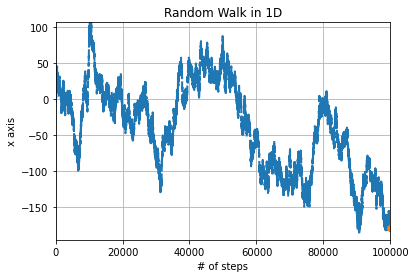

In [114]:
fig=plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N +2), ylim=(xmin -2, xmax -2))
ax.grid()
ax.set_xlabel('# of steps')
ax.set_ylabel("x axis")
plt.title("Random Walk in 1D")

# 1. Plot the initial state of the plot
line, *_ = ax.plot(steps[0], position[0], '--', lw=2)
ball, *_ = ax.plot([],[], 'o-', lw=10)

# 2. Define an "update_plots" function to call at each frame.
# Each call to animate with argument i modifies the line and ball object which is the plot being shown.
# In our case we use i to draw the i-th position.
def update_plots(i):
    # Draw the i-th position
    line.set_data(steps[:i], position[:i])
    ball.set_data(steps[i], position[i])
    # Return a tuple
    return line,ball

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(0, N-1)
ani = animation.FuncAnimation(fig, update_plots, np.arange(0, N-1, 100), interval=50, blit=True, repeat=False)

# Here is the rendering that makes it work on Colab
rc('animation', html='html5')
ani

# Statistic on 1D Random Walk

In [118]:
Nrw=int(10e3)
Nstep=int(10e3)

step = np.random.choice([-1, 1], size=Nstep) # N steps
position = np.cumsum(step) # integrate the position by summing steps values
steps = np.arange(0, N ,1) #vector that count passes

help(np.cumsum)

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See `ufuncs-output-type` for
    